# XOR probléma

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [-3.0, 3.0],
    [-2.4, 1.5],
    [-2.12, -1.85],
    [-0.7, -0.5],
    [0.27, 0.45],
    [1.97, -2.45],
    [1.27, -1.45],
    [2.27, 3.45],
])

y = np.array([
    1,
    1,
    0,
    0,
    0,
    1,
    1,
    0
])

In [3]:
def perceptron(X, y, dim, alpha=0.1, N=1000, epsilon = 1e-3, plot=False):
    theta = np.zeros(dim + 1)
    X_ = np.hstack((np.zeros((X.shape[0], 1)), X))
    for j in range(N):
        dt = X_ @ theta
        h = np.where(dt > 0, 1, 0)
        err = y - h
        theta = theta + alpha*(err) @ X_
        # Debug plot
        if plot:
            plt.figure(figsize=(3,3))
            lt = np.linspace(-3, 3, 100)
            m = -theta[1]/theta[2]
            b = -theta[0]/theta[2]
            plt.axvline(x=0, color='r', linestyle='--')
            plt.axhline(y=0, color='r', linestyle='--')
            plt.scatter(X_[:,1], X_[:,2], c=y)
            plt.ylim((-4, 4))
            plt.plot(lt, m * lt + b)
            plt.show()
        # Check convergency
        if np.sum(np.abs(err)) < epsilon:
            break        
    return theta

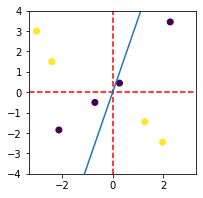

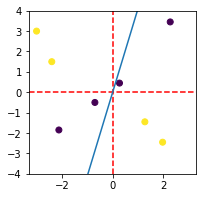

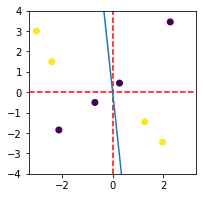

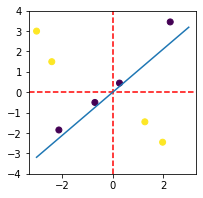

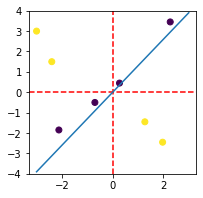

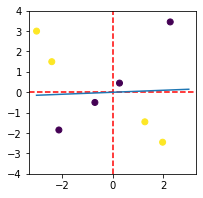

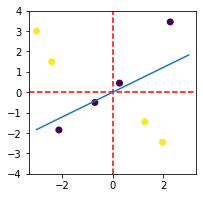

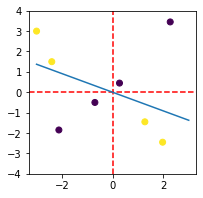

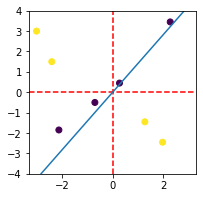

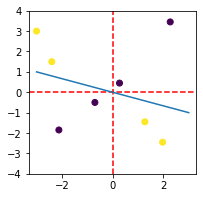

[ 0.   -0.08 -0.24]


In [4]:
theta  = perceptron(X, y, X.shape[1], N=10, plot=True)
print(theta)


## Megoldás Pytorch segítségével

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [6]:
class XORSolver(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(XORSolver, self).__init__()
        self.linear = nn.Linear(input_dim,2)
        self.linear2 = nn.Linear(2, output_dim)
        
    def forward(self, x):
        x = self.linear(x)
        x = F.sigmoid(x)
        x = self.linear2(x)
        return x

In [7]:
net = XORSolver()

In [8]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(net)

In [9]:
# Data
import numpy as np
X = np.array([
    [-3.0, 3.0],
    [-2.4, 1.5],
    [-2.12, -1.85],
    [-0.7, -0.5],
    [0.27, 0.45],
    [1.97, -2.45],
    [1.27, -1.45],
    [2.27, 3.45],
])

y = np.array([
    1,
    1,
    0,
    0,
    0,
    1,
    1,
    0
])

In [10]:
# Hyperparameters
epochs = 500
steps = X.shape[0]
print(steps)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plt_iter = 10

8


In [11]:
X_ = torch.from_numpy(X).type(torch.FloatTensor)
y_ = torch.from_numpy(y).type(torch.FloatTensor)

In [12]:

for epoch in range(epochs):
    for i in range(steps):
        x_var = Variable(X_[i], requires_grad=False)
        y_var = Variable(y_[i], requires_grad=False)
        
        optimizer.zero_grad()
        yhat = net(x_var)
        loss = loss_func.forward(yhat, y_var)    
        loss.backward()
        optimizer.step()
        
        current_loss += loss
        if epoch %  plt_iter == 0:
            all_losses.append(loss)
    if (epoch+1) % 500 == 0:
        print(f"{epoch} completed, Loss {loss}")

C:\Anaconda3\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


499 completed, Loss 1.6340892727839673e-07


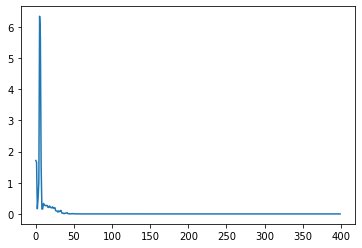

In [13]:
import matplotlib.pyplot as plt
plt.plot(all_losses)

In [14]:
print(f"Parameters: \n {net.linear2.weight} \n {net.linear2.bias}")

Parameters: 
 Parameter containing:
tensor([[ 1.1642, -1.1656]], requires_grad=True) 
 Parameter containing:
tensor([1.0053], requires_grad=True)


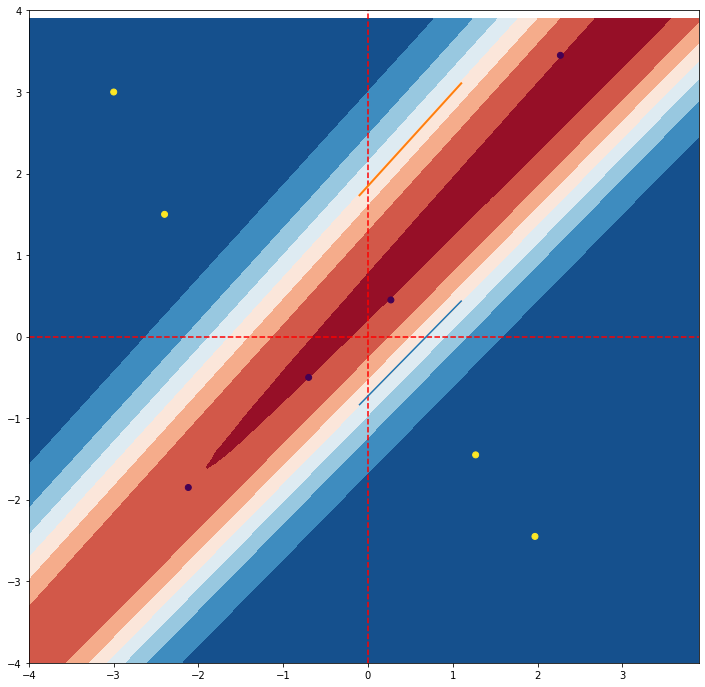

In [15]:
plt.figure(figsize=(12,12))
lt = np.linspace(-3, 3, 100)
plt.ylim((-4, 4))
# Plot contour
x1grid = np.arange(-4, 4, 0.1)
x2grid = np.arange(-4, 4, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
#
yhat = net(torch.from_numpy(grid).type(torch.FloatTensor)).detach().numpy()
#
zz = yhat.reshape(xx.shape)
c = plt.contourf(xx, yy, zz, cmap='RdBu')
# Show everything
plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(X[:,0], X[:,1], c=y)



model_params = list(net.parameters())

model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()


x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2, linewidth=2)

plt.show()

In [19]:
from torchviz import make_dot
yhat = net(torch.from_numpy(grid).type(torch.FloatTensor))
make_dot(yhat, params=dict(list(net.named_parameters()))).render("rnn_torchviz", format="png")

C:\Anaconda3\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


'rnn_torchviz.png'